# Dataset analysis
Understand the dataset in order to make good choices during the preprocessing phase.



Dataset Information:
total_transactions: 284807
num_features: 30
class_distribution: {0: 284315, 1: 492}
fraud_percentage: 0.1727485630620034
missing_values: {'Time': 0, 'V1': 0, 'V2': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 0, 'V7': 0, 'V8': 0, 'V9': 0, 'V10': 0, 'V11': 0, 'V12': 0, 'V13': 0, 'V14': 0, 'V15': 0, 'V16': 0, 'V17': 0, 'V18': 0, 'V19': 0, 'V20': 0, 'V21': 0, 'V22': 0, 'V23': 0, 'V24': 0, 'V25': 0, 'V26': 0, 'V27': 0, 'V28': 0, 'Amount': 0, 'Class': 0}


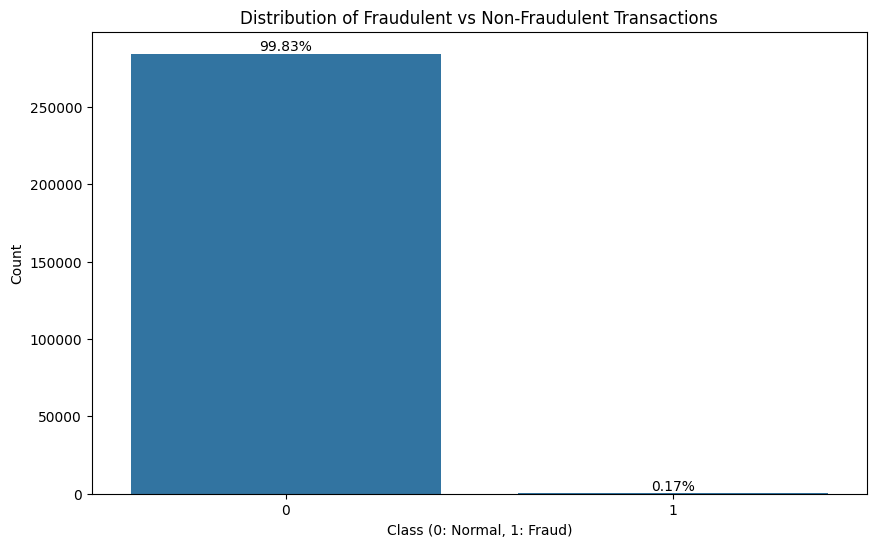

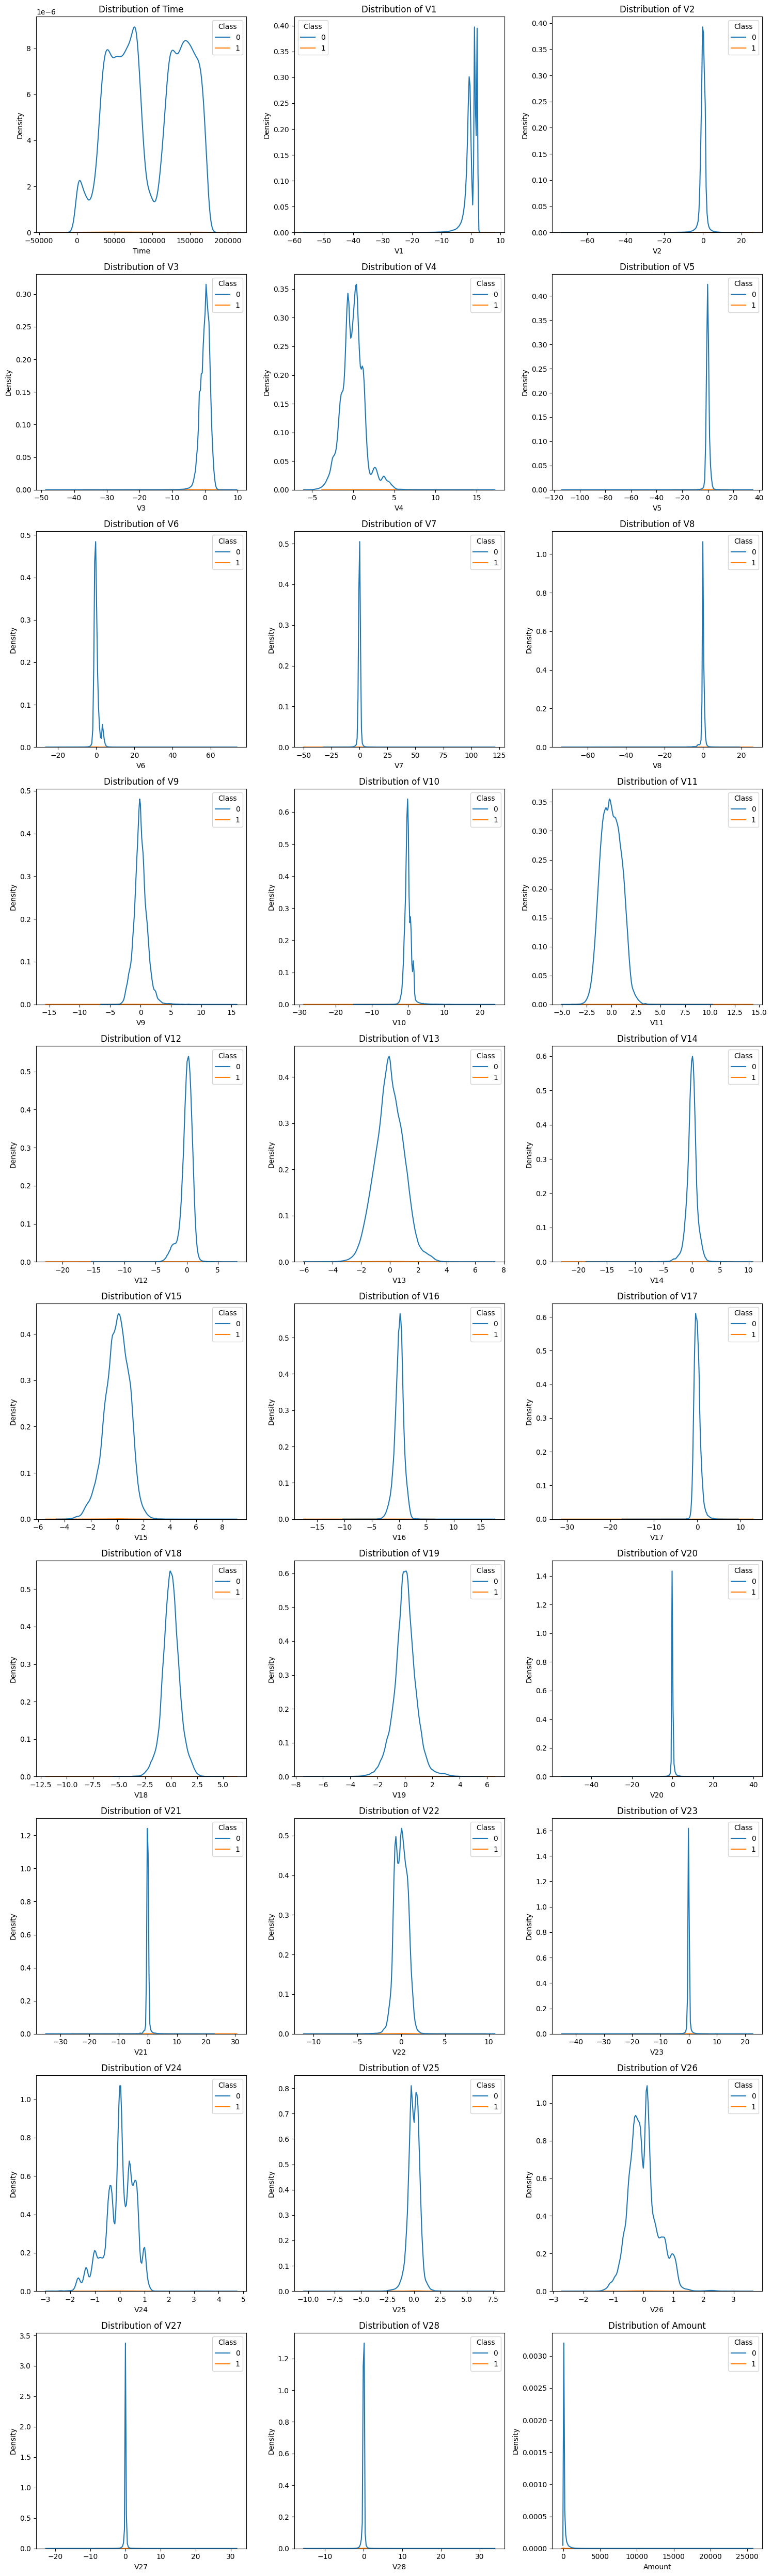

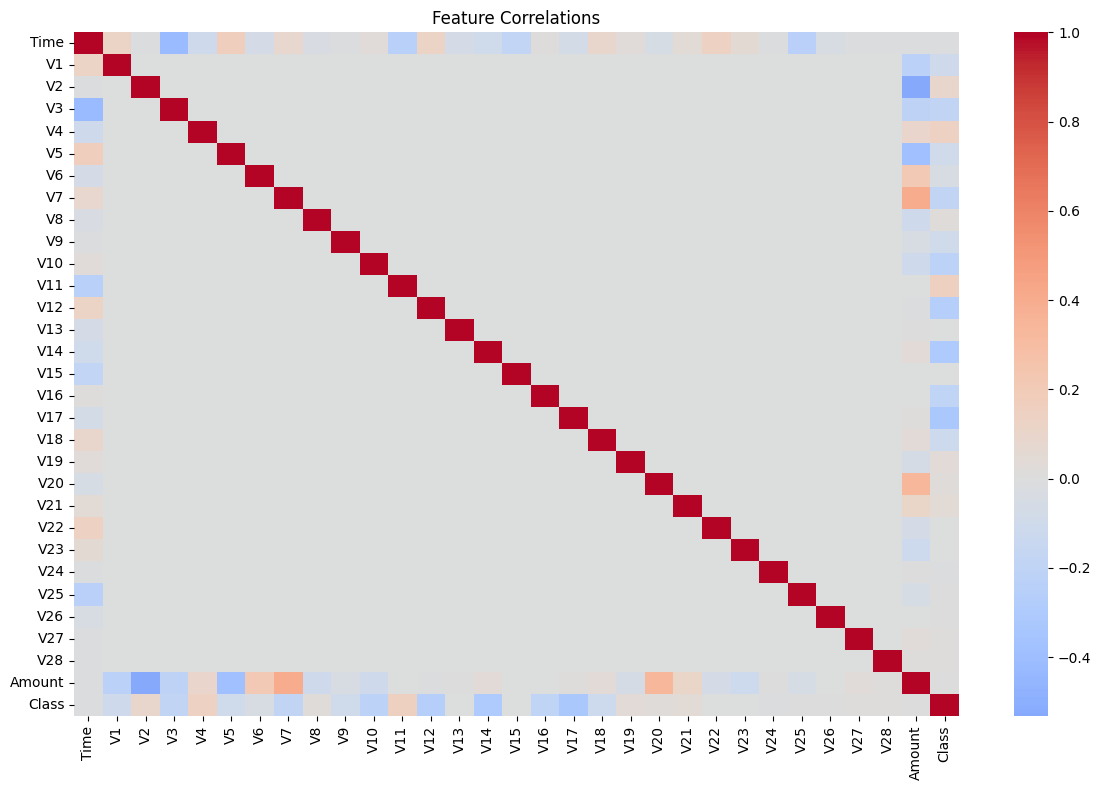

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class CreditCardDataAnalyzer:
    """Class to handle credit card fraud data analysis"""

    def __init__(self, df):
        """
        Initialize with a pandas DataFrame
        Args:
            df: pandas DataFrame containing credit card transaction data
        """
        self.df = df
        self.features = [col for col in df.columns if col not in ['Class']]

    # Basic information on the dataset
    def get_basic_info(self):
        """Analyze basic dataset information"""
        info = {
            'total_transactions': len(self.df),
            'num_features': len(self.features),
            'class_distribution': self.df['Class'].value_counts().to_dict(),
            'fraud_percentage': (self.df['Class'].sum() / len(self.df)) * 100,
            'missing_values': self.df.isnull().sum().to_dict()
        }
        return info

    # Statistical analysis of features (distribution charts)
    def analyze_feature_distributions(self):
        """Analyze the statistical distribution of features"""
        distributions = {}
        for feature in self.features:
            feature_stats = {
                'mean': self.df[feature].mean(),
                'median': self.df[feature].median(),
                'std': self.df[feature].std(),
                'skewness': stats.skew(self.df[feature]),
                'kurtosis': stats.kurtosis(self.df[feature])
            }
            distributions[feature] = feature_stats
        return distributions

    # Class distribution (fraud vs legitimate)
    def plot_class_distribution(self):
        """Plot the distribution of fraudulent vs non-fraudulent transactions"""
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='Class')
        plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
        plt.xlabel('Class (0: Normal, 1: Fraud)')
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(self.df)
        for i in [0, 1]:
            count = len(self.df[self.df['Class'] == i])
            pct = count/total * 100
            plt.text(i, count, f'{pct:.2f}%', ha='center', va='bottom')

        plt.show()

    # Feature distribution plots based on statistical analysis
    def plot_feature_distributions(self, n_cols=3):
        """Plot distribution of each feature, colored by class"""
        n_features = len(self.features)
        n_rows = (n_features + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.ravel()

        for idx, feature in enumerate(self.features):
            sns.kdeplot(
                data=self.df,
                x=feature,
                hue='Class',
                ax=axes[idx]
            )
            axes[idx].set_title(f'Distribution of {feature}')

        # Remove empty subplots
        for idx in range(len(self.features), len(axes)):
            fig.delaxes(axes[idx])

        plt.tight_layout()
        #plt.ylim(0, 0.1)  # Adjust the y-axis limit
        plt.show()

    # Analyse feature correlations and plot a heatmap
    def analyze_correlations(self):
        """Analyze correlations between features and with the target"""
        # Correlation with target
        correlations = {}
        for feature in self.features:
            correlation = np.corrcoef(
                self.df[feature],
                self.df['Class']
            )[0,1]
            correlations[feature] = correlation

        # Plot correlation heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            self.df.corr(),
            cmap='coolwarm',
            center=0,
            annot=False
        )
        plt.title('Feature Correlations')
        plt.tight_layout()
        plt.show()

        return correlations

# Run the analysis
###################

# Load the data
df = pd.read_csv('../data/creditcard.csv')

# Create analyzer instance and give it the dataframe
analyzer = CreditCardDataAnalyzer(df)

# Get basic information
info = analyzer.get_basic_info()
print("\nDataset Information:")
for key, value in info.items():
    print(f"{key}: {value}")

# Plot class distribution
analyzer.plot_class_distribution()

# Analyze feature distributions
distributions = analyzer.analyze_feature_distributions()

# Plot feature distributions
analyzer.plot_feature_distributions()

# Analyze correlations
correlations = analyzer.analyze_correlations()